In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def quantization(img, bits):
    new_image = img.copy()
    nr, nc = img.shape
    # 幾種灰階 eg. 2bits有4種灰階
    level = 2**bits
    # 灰階的間隔範圍 256/4= 64, 0-64;64-128;128-192;192-256
    interval = 256/level 
    gray_level_interval = 255/(level-1)
    # look up table
    table = np.zeros(256)
    
    # 建立look up table
    for k in range(256):
        for l in range(level):
            if k>=l*interval and k<(l+1)*interval:
                table[k] = round(l*gray_level_interval)
    # 查表
    for x in range(nr):
        for y in range(nc):
            new_image[x,y] = table[img[x,y]]

    return new_image

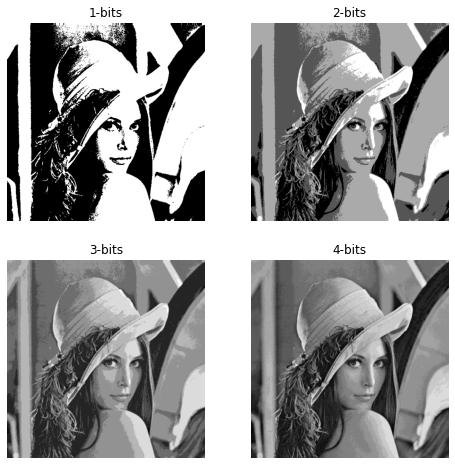

In [102]:
if __name__ == "__main__":
    img = cv2.imread('./lenna.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bits = [1, 2 ,3, 4]
    
    plt.rcParams['figure.figsize'] = (8,8)
    
    for i , bit in enumerate(bits):
        new = quantization(img, bit)
        plt.subplot(2,2,i+1)
        plt.axis('off')
        plt.title(f'{str(bit)}-bits')
        plt.imshow(new,cmap='gray')
        
    
    plt.show()